<a href="https://colab.research.google.com/github/jon-pun/Spring-2023-ORIE-4741/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: Jonathan Yun (jly37)

### Github link: [here](https://github.com/jon-pun/Spring-2023-ORIE-4741/blob/main/HW5.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.


___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.

In this case, the pmf of $Y$ is equal to:

\begin{cases}
      (1-p)^{x}p & x\in \mathbb{Z}, 0 \leq x \leq 39 \\
      1 - \sum_{x = 0}^{39}(1-p)^{x}p & x = 40 \\
      0 & \text{otherwise}
   \end{cases}



___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.


In [2]:
# packages
import scipy as sc
import numpy as np
import pandas as pd

In [ ]:
# import data
soup = pd.read_csv("Soup_sales_data.csv")

In [ ]:
soup.head()

,Day,Y
0,1,40
1,2,3
2,3,33
3,4,24
4,5,28


Since we know that the likelihood of the sample is the product of the individual likelihoods:

\begin{align*}
L(p) &= \prod\limits_{i=1}^n Y(X_i | p) \\
\ln L(p) &= \sum_{i=1}^n\ln(Y(X_i | p))
\end{align*}

From here, we can actually use `scipy.optimize.minimize` to maximize the log-likelihood function (or, I guess minimize the negative version of it, which is the same thing), and thus find the MLE estimate, $\hat{p}$.

In [ ]:
# first, construct the pmf, given some p

def pmf_1(x, p):

  if x == 40:
    probs_1_30 = []
    for i in range(40):
      probs_1_30.append((1 - p)**i * p)
    return 1 - np.sum(probs_1_30)
  elif x >= 0 and x <= 39:
    return (1 - p)**(x) * p
  else:
    return 0

# then, construct the log_likelihood function, for some array of data x and some p
def log_likelihood(x, p):
  n = len(x)
  likelihood = []

  for i in range(n):
    likelihood.append(pmf_1(x[i], p))
  return np.log(np.prod(likelihood))

# now, specify the negative log-likelihood, also inputting the data from which the MLE estimator will be constructed
def neg_log_likelihood(p):
  x = np.array(soup['Y'])
  log_lik = log_likelihood(x, p)
  return -1 * log_lik

In [ ]:
# now, scipy.optimize.minimize

opt = sc.optimize.minimize(neg_log_likelihood, x0 = 0.1, bounds = sc.optimize.Bounds(lb = 0.001, ub = 1))
mle_est = opt.x

print(mle_est)

[0.02679658]


<ipython-input-55-5511c2bbf704>:22: RuntimeWarning: divide by zero encountered in log
  return np.log(np.prod(likelihood))


Text(0.5, 1.0, 'The Log-Likelihood Function for Y')

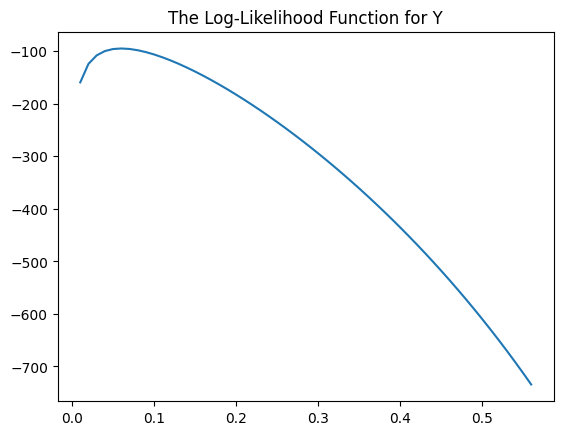

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0.0, 1.0, 0.01), -1 * neg_log_likelihood(np.arange(0.0, 1.0, 0.01)))
plt.title("The Log-Likelihood Function for Y")

Both `scipy.optimize.optimize` and the plot seem to support the same conclusion: $\hat{p} = 0.0268$!

___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

Intuitively, it is actually easier to determine the odds that *no one* shares a birthday, which is as follows:

for $n = 1$, that $P(\text{sharing a birthday}) = 1$  
for $n = 2$, that $P(\text{sharing a birthday}) = 1 \times \frac{364}{365}$  
for $n = 3$, that $P(\text{sharing a birthday}) = 1 \times \frac{364}{365} \times \frac{363}{365}$   
for $n = 4$, that $P(\text{sharing a birthday}) = 1 \times \frac{364}{365} \times \frac{363}{365} \times \frac{362}{365}$   
and so on, such that we can say that the overall probability no one $x$ people sharing a birthday is as follows:

$$ p(x) = \frac{365!}{365^x  \times (n-1)!}$$ provided $x < 365$ (intuitively, $p(x) = 0$ when $x \geq 365$).  

Thusly, we can take the compliment to determine the odds of *at least two people sharing a birthday*, which is as follows:

$$ p(x) = 1 - \frac{365!}{365^x  \times (365 - x)!}$$ provided $x < 365$ (intuitively, $p(x) = 1$ when $x \geq 365$).


[0.11694817771107768, 0.14114137832173312, 0.1670247888380645, 0.19441027523242949, 0.2231025120049731, 0.25290131976368646, 0.2836040052528501, 0.3150076652965609, 0.3469114178717896, 0.37911852603153695, 0.41143838358058027, 0.443688335165206, 0.4756953076625503, 0.5072972343239857, 0.538344257914529, 0.568699703969464, 0.598240820135939, 0.6268592822632421, 0.6544614723423995, 0.6809685374777771, 0.7063162427192688, 0.7304546337286439, 0.7533475278503208, 0.7749718541757721, 0.7953168646201543, 0.8143832388747153, 0.8321821063798795, 0.8487340082163846, 0.864067821082121, 0.878219664366722, 0.891231809817949, 0.9031516114817354, 0.9140304715618692, 0.9239228556561199, 0.9328853685514263, 0.940975899465775, 0.9482528433672548, 0.9547744028332994, 0.9605979728794225, 0.9657796093226765, 0.9703735795779884]


Text(0, 0.5, 'probability')

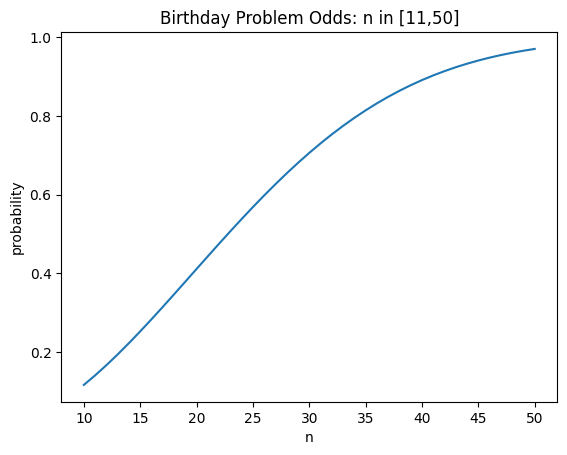

In [ ]:
# plotting this out

n = np.arange(10,51,1)
output = []
for i in n:
  probs_zero = np.zeros(i)
  for j in range(i):
    probs_zero[j] = (365 - j) / 365
  output.append(1 - np.prod(probs_zero))

print(output)

plt.plot(n, output)
plt.title("Birthday Problem Odds: n in [11,50]")
plt.xlabel("n")
plt.ylabel("probability")

___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

First, some quick math: for the $95\%$ CI to be within 2 decimal places, we want the upper and lower bound of the CI to have a width of $0.005$; thus, with $z = 1.96$, the standard deviation of the estimate should be $\frac{.005}{1.96} = 0.00255$.  

Thus, every time we run a simulation, we should adjust initial $k$ to get this same sample $\hat{\sigma}$. Without further ado:

In [ ]:
# first, a way to simulate the assignment of people to days; in this case, i'll assign each person a day (1,2,...,365) to be their birthday
# if there are any repeats in this list of birthday, two people share the birthday; else, there is no sharing

# get n
n = np.arange(15,31,1)

est = []
std = []

# setting k for 'pilot run'
k = 100

for i in range(len(n)):

  # performing the pilot run

  results = np.zeros(k)

  for j in range(k):
    sims = np.random.uniform(0, 1, n[i])
    sims = np.floor(365 * sims + 1)

    sims = pd.Series(sims)

    if sims.duplicated().any():
      results[j] = 1
    else:
      results[j] = 0

  # computing std_k and mu_k, so we can adjust and find N
  mu_k = np.sum(results) / k
  std_k = np.std(results)

  # finding N
  N = int(np.ceil(1.96**2 * std_k**2 / (.005**2)))

  # now, run the actual test, with sample size N

  results = np.zeros(N)

  for j in range(N):
    sims = np.random.uniform(0, 1, n[i])
    sims = np.floor(365 * sims + 1)

    sims = pd.Series(sims)

    if sims.duplicated().any():
      results[j] = 1
    else:
      results[j] = 0

  mu_N = np.sum(results) / N
  std_N = np.std(results) / np.sqrt(N)

  est.append(mu_N)
  std.append(std_N)





In [ ]:
print(std)

[0.002714374695327653, 0.0024036115715632893, 0.0025491478405163972, 0.002489302173849855, 0.0025137374892208113, 0.0025211293800824312, 0.0025596414738779925, 0.0025481212304892626, 0.002559009124618506, 0.002577721179671991, 0.0025667590713449396, 0.0025055170552857682, 0.0024923099170428035, 0.0024475114067383217, 0.002464179213288866, 0.002685728243009683]


Incredible! The standard deviations for the CI bounds look absolutely perfect :)

Now, all that's left to do is some plotting!

Text(0, 0.5, 'probability')

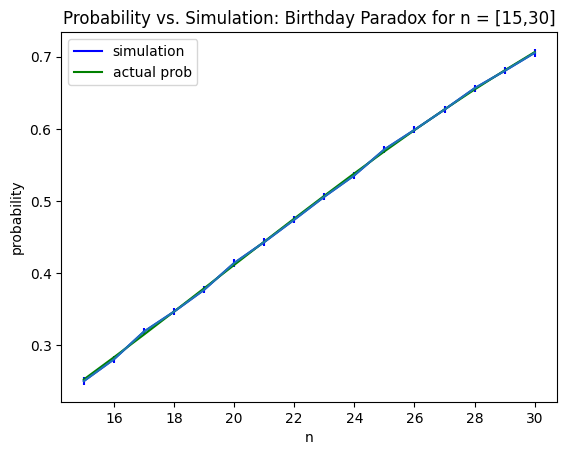

In [ ]:
# plotting the output of the simulations, with CIs
plt.plot(n, est, label = 'simulation', color = 'blue')
plt.errorbar(n, est, yerr = 1.96 * np.array(std), ecolor = 'blue')

# plotting the actual probabilities

output = []
for i in n:
  probs_zero = np.zeros(i)
  for j in range(i):
    probs_zero[j] = (365 - j) / 365
  output.append(1 - np.prod(probs_zero))

plt.plot(n, output, label = 'actual prob', color = 'green')
plt.legend()

plt.title("Probability vs. Simulation: Birthday Paradox for n = [15,30]")
plt.xlabel("n")
plt.ylabel("probability")




---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

In [ ]:
# For loading the data, you can use "df = pd.read_csv('bdaydata.txt',sep=' ')"
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"

In [25]:
# first, let's load in the data

bdays = pd.read_csv('bdaydata.txt', sep = ' ')
bdays.head(10)

,date,count
0,101,1482
1,102,1213
2,103,1220
3,104,1319
4,105,1262
5,106,1271
6,107,1355
7,108,1219
8,109,1253
9,110,1339


Text(0, 0.5, 'probability')

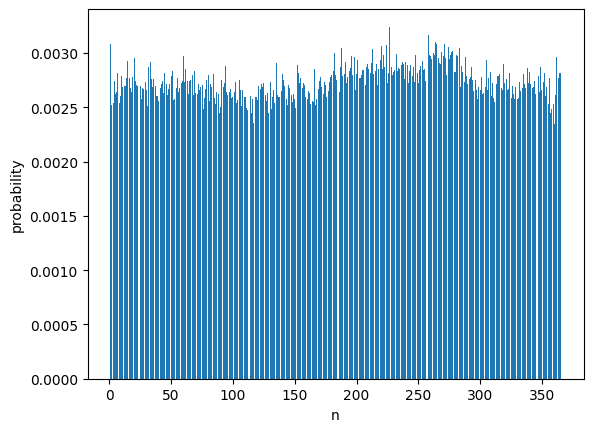

In [ ]:
# part (i): empirical histogram

# here, i assume though it says 'histogram', it actually makes the most sense to build a bar chart, such that n can be on the x axis
plt.bar(bdays.index + 1, bdays['count'] / np.sum(bdays['count']))
plt.xlabel("n")
plt.ylabel("probability")

Text(0.5, 0, 'count of people with this birthday')

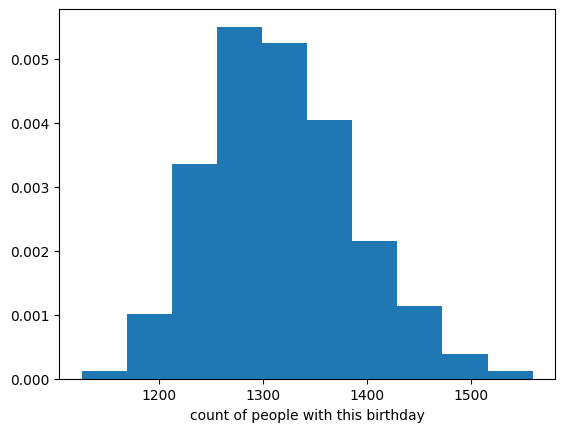

In [ ]:
# but also here's a real histogram too haha
plt.hist(bdays['count'], density = True)
plt.xlabel("count of people with this birthday")

Text(0, 0.5, 'probability')

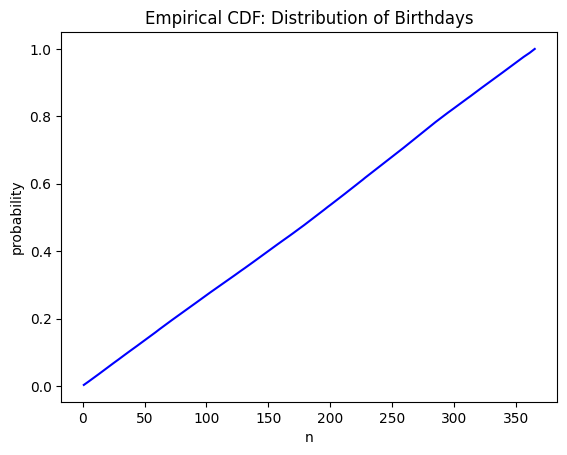

In [ ]:
# part (ii): empirical cdf

# i think a cdf of the latter (the histogram with count of people with any birthday) would be useless, so let me present an empirical cdf across
# values of n (which i think would be much more useful)

cumsum = np.cumsum(np.array(bdays['count']))
cum_freq = cumsum / np.sum(bdays['count'])

plt.plot(np.arange(1,366,1), cum_freq, color = "blue")
plt.title("Empirical CDF: Distribution of Birthdays")
plt.xlabel("n")
plt.ylabel("probability")

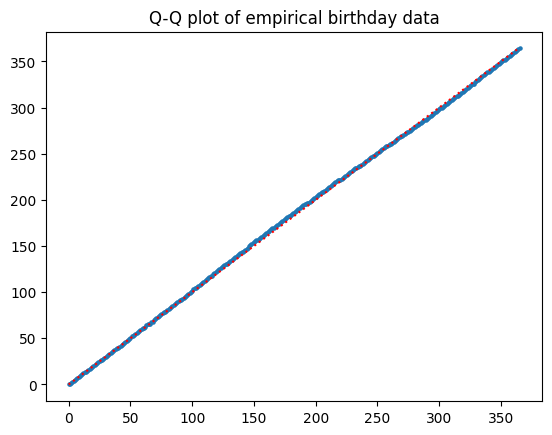

In [ ]:
# part (iii): Q-Q plot

# code borrowed from rec6, Q3 answer
R = np.arange(0,366,1)
sizeR = len(R)

Y = (np.array(range(sizeR))+0.5)/sizeR
Z = np.zeros(sizeR)

CDF = cum_freq

CDF_idx = 0
for i in range(sizeR):
    while CDF[CDF_idx]<Y[i]:
        CDF_idx += 1
    Z[i] = CDF_idx

plt.scatter(R,Z,s=5)
plt.plot(range(365),':r')

plt.title("Q-Q plot of empirical birthday data")
plt.show()

___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [28]:
# first, the chi-square test

chisq = sc.stats.chisquare(bdays['count'], np.full(365, np.sum(bdays['count'])/365.0))
print("Chi-square test statistic =", chisq[0])
print("p-value =", chisq[1])

Chi-square test statistic = 1352.7233599950073
p-value = 1.2489373800065057e-113


In [30]:
# now, the kolmogorov-smirnov test

ks = sc.stats.kstest(bdays['count'], np.full(365, np.sum(bdays['count'])/365.0))
print("K-S test statistic =", ks[0])
print("p-value =", ks[1])

K-S test statistic = 0.5397260273972603
p-value = 4.4232442550925854e-49


Regardless of test chosen, it seems the data is not very well modeled by a uniform distribution! Both p-values are very small ($p$ is far far less than 0.05 in both cases), suggesting we should reject the null that the distributions are identical, and thus that the birthdays are well-modelled by a uniform distribution.

___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


Text(0, 0.5, 'probability')

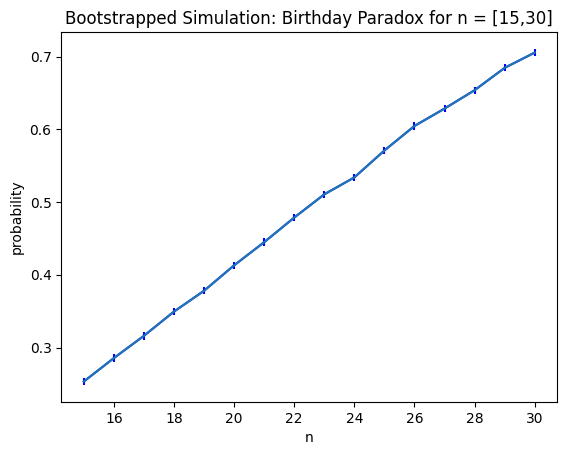

In [ ]:
# same rules as above for determining shared birthdays

# get n
n = np.arange(15,31,1)

est = []
std = []

# setting k for 'pilot run'
k = 100

for i in range(len(n)):

  # performing the pilot run

  results = np.zeros(k)

  for j in range(k):
    sims = np.random.uniform(0, 1, n[i])
    sims_value = np.searchsorted(cum_freq, sims) + 1

    sims_value = pd.Series(sims_value)

    if sims_value.duplicated().any():
      results[j] = 1
    else:
      results[j] = 0

  # computing std_k and mu_k, so we can adjust and find N
  mu_k = np.sum(results) / k
  std_k = np.std(results)

  # finding N
  N = int(np.ceil(1.96**2 * std_k**2 / (.005**2)))

  # now, run the actual test, with sample size N

  results = np.zeros(N)

  for j in range(N):
    sims = np.random.uniform(0, 1, n[i])
    sims_value = np.searchsorted(cum_freq, sims) + 1

    sims_value = pd.Series(sims_value)

    if sims_value.duplicated().any():
      results[j] = 1
    else:
      results[j] = 0

  mu_N = np.sum(results) / N
  std_N = np.std(results) / np.sqrt(N)

  est.append(mu_N)
  std.append(std_N)


# plotting the output of the simulations, with CIs
plt.plot(n, est, label = 'simulation', color = 'blue')
plt.errorbar(n, est, yerr = 1.96 * np.array(std), ecolor = 'blue')


plt.title("Bootstrapped Simulation: Birthday Paradox for n = [15,30]")
plt.xlabel("n")
plt.ylabel("probability")



**For comparison:** the plot largely follows the same contours as part (b) (starting with a probability $< 0.3$ at $n = 15$, ending with a probability around $0.7$ for $n = 30$), but has slightly more variation: of note, there seems to be a dip around $n = 24$ and unevenness from $n = 26$ to $n = 30$, but otherwise it looks nearly identical!

___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

In [5]:
n = 1500

#from scipy.misc import factorial
fact_series = sc.special.factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
 first_digit[i] = int(str(fact_series[i])[0])

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [9]:
# first, getting the frequencies of the digits

values, counts = np.unique(first_digit, return_counts = True)
print(values)
print(counts)

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[438 255 183 163 112 124  80  77  68]


In [22]:
digit_freq = counts# / np.sum(counts)

# then, the comparison distribution
uniform_freq = np.full(9, np.sum(counts) / 9.0)

In [20]:
print(digit_freq)

[0.292      0.17       0.122      0.10866667 0.07466667 0.08266667
 0.05333333 0.05133333 0.04533333]


In [23]:
# now, the chi-square test

chisq = sc.stats.chisquare(digit_freq, uniform_freq)
print("Chi-square test statistic =", chisq[0])
print("p-value =", chisq[1])

Chi-square test statistic = 670.8000000000002
p-value = 1.3805718582880795e-139


From this, it's clear the data is not very well represented by the uniform distribution! In fact, given $p$ is clearly less than 0.05, we reject the null hypothesis that the two distributions are the same (and thus reject that digits are well represented by a uniform).

___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [31]:
# first, let's find the expect counts

d = np.arange(1,10,1)
prob_d = np.log10(d + 1) - np.log10(d)
d_freq = np.sum(counts) * prob_d

print(d_freq)

# now, the chi-square test

chisq = sc.stats.chisquare(digit_freq, d_freq)
print("Chi-square test statistic =", chisq[0])
print("p-value =", chisq[1])

[451.5449935  264.13688858 187.40810491 145.36501951 118.77186907
 100.42018445  86.98792047  76.72878367  68.63623584]
Chi-square test statistic = 9.456569118464648
p-value = 0.3052548339606756


___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

In [33]:
# read in data, get first digit

zips = pd.read_csv("us_pop.csv")
zips.head()

first_digit = np.zeros(len(zips))
for i in range(len(zips)):
 first_digit[i] = int(str(zips['zipcode'][i])[0])

print(first_digit[0:10])

[1. 2. 2. 8. 2. 4. 3. 2. 5. 2.]


In [34]:
# now, getting the frequencies of the digits

zip_values, zip_counts = np.unique(first_digit, return_counts = True)
print(zip_values)
print(zip_counts)

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[11907 10935 11104 12425 12099 12187 12277  7419  9647]


In [39]:
# now, the comparison distributions

uniform_zip = np.full(9, np.sum(zip_counts) / 9.0)
d_uniform = np.sum(zip_counts) * prob_d

In [36]:
# lastly, the chi-square test on the uniform

chisq = sc.stats.chisquare(zip_counts, uniform_zip)
print("Chi-square test statistic =", chisq[0])
print("p-value =", chisq[1])

Chi-square test statistic = 1949.29856
p-value = 0.0


In [37]:
# and, the chi-square test on the benford's law dist

chisq = sc.stats.chisquare(zip_counts, d_uniform)
print("Chi-square test statistic =", chisq[0])
print("p-value =", chisq[1])

Chi-square test statistic = 35061.47098471453
p-value = 0.0


The interesting result that emerges is not only are the zip codes not well modelled by a uniform distribution ($p$ is clearly $< 0.05$ here), it's actually *worse* when you see if it's better modelled by the Benford's law distribution ($p$ is still $< 0.05$, AND the chi-sq test statistic went up dramatically). In this case, it seems the zip code data doesn't seem to follow either distribution, which is crazy.

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.